In [ ]:
import pandas as pd

df=pd.read_csv("Top-100 Trending Books.csv")
df1=pd.read_csv("customer reviews.csv")

In [ ]:
df1.shape

(920, 10)

**PRE PROCESSING OF TEXT DATA**

Merging of 2 files

In [ ]:
merged_df = pd.merge(df, df1, left_on='book title', right_on='book name', how='inner')

merged_df.drop('book name', axis=1, inplace=True)

convert to lowercase

In [ ]:
merged_df['review description']=merged_df['review description'].str.lower()
merged_df['review description'].head()

0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

remove html tags

In [ ]:
from bs4 import BeautifulSoup
def remove_html_tags(review_description):
    soup = BeautifulSoup(review_description, 'html.parser')
    return soup.get_text()

merged_df['review description'] = merged_df['review description'].apply(remove_html_tags)
merged_df['review description'].head()

<ipython-input-4-eca98e08cd0f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(review_description, 'html.parser')


0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

remove whitespace

In [ ]:
merged_df['review description']=merged_df['review description'].str.strip()
merged_df['review description'].head()

0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

remove urls

In [ ]:
import re
def remove_urls(review_description):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(" ", review_description)

merged_df['review description'] = merged_df['review description'].apply(remove_urls)
merged_df['review description'].head()

0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

remove punctuations

In [ ]:
import string, time
string.punctuation

exclude=string.punctuation
def remove_punc(review_description):
    without_punc=review_description.translate(str.maketrans("", "", string.punctuation))
    return without_punc

merged_df['review description'] = merged_df['review description'].apply(remove_punc)
merged_df['review description'].head()

0    im only a third way in shipped lightening fast...
1    there have been so many times when i was scare...
2    the media could not be loaded i personally hav...
3    i have been a fan of britneys music since the ...
4    whether or not you’re a fan it’s a great read ...
Name: review description, dtype: object

remove special characters

In [ ]:
import string

def remove_special_characters(text):
    characters_to_remove = string.punctuation + "’"

    without_special_chars = ''.join(char for char in text if char not in characters_to_remove)

    return without_special_chars

merged_df['review description'] = merged_df['review description'].apply(remove_special_characters)
merged_df['review description'].head()

0    im only a third way in shipped lightening fast...
1    there have been so many times when i was scare...
2    the media could not be loaded i personally hav...
3    i have been a fan of britneys music since the ...
4    whether or not youre a fan its a great read br...
Name: review description, dtype: object

removing of abbreviated words

In [ ]:
chat_words={"BRB" : "Be right back",
"BTW": "By the way",
"OMG": "Oh my God/goodness",
"TTYL": "Talk to you later",
"OMW" : "On my way",
"SMH/SMDH" : "Shaking my head/shaking my darn head",
"LOL" : "Laugh out loud",
"TBD" : "To be determined",
"IMHO/IMO" : "In my humble opinion",
"HMU" : "Hit me up",
"IIRC" : "If I remember correctly",
"LMK" : "Let me know",
"OG" : "Original gangsters (used for old friends)",
"FTW" : "For the win",
"NVM" : "Nevermind",
"OOTD" : "Outfit of the day",
"Ngl" : "Not gonna lie",
"Rq" : "real quick",
"Iykyk" : "If you know, you know",
"Ong" : "On god (I swear)",
"YAAAS" : "Yes!",
"Brt" : "Be right there",
"Sm" : "So much",
"Ig" : "I guess",
"Wya" : "Where you at",
"Istg" : "I swear to god",
"Hbu" : "How about you",
"Atm" : "At the moment",
"Asap" : "As soon as possible",
"Fyi" : "For your information"}

def handle_chat_words(review_description):
    words = review_description.split()

    for i in range(len(words)):
        if words[i] in chat_words:
            words[i] = chat_words[words[i]]

    modified_description = ' '.join(words)

    return modified_description

merged_df['review description'] = merged_df['review description'].apply(handle_chat_words)
merged_df['review description'].head()

0    im only a third way in shipped lightening fast...
1    there have been so many times when i was scare...
2    the media could not be loaded i personally hav...
3    i have been a fan of britneys music since the ...
4    whether or not youre a fan its a great read br...
Name: review description, dtype: object

remove emojis

In [ ]:
def remove_emojis(review_description):
    emoji_pattern = re.compile(r'[\U0001F000-\U0001F9FF]|[\U0001F300-\U0001F5FF]|[\U0001F600-\U0001F64F]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]|[\U0001f926-\U0001f937]|[\U0001F1E0-\U0001F1FF]')

    without_emojis = emoji_pattern.sub('', review_description)
    return without_emojis

merged_df['review description'] = merged_df['review description'].apply(remove_emojis)
merged_df['review description'].head()

0    im only a third way in shipped lightening fast...
1    there have been so many times when i was scare...
2    the media could not be loaded i personally hav...
3    i have been a fan of britneys music since the ...
4    whether or not youre a fan its a great read br...
Name: review description, dtype: object

remove stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(review_description):
    words = review_description.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_description = ' '.join(filtered_words)

    return filtered_description

merged_df['review description'] = merged_df['review description'].apply(remove_stop_words)
merged_df['review description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    im third way shipped lightening fastthe print ...
1    many times scared speak afraid somebody would ...
2    media could loaded personally exact situations...
3    fan britneys music since 00s couple years olde...
4    whether youre fan great read britney takes wor...
Name: review description, dtype: object

In [ ]:
sentimentstars_counts = merged_df['reviewer rating'].value_counts()

print(sentimentstars_counts)

reviewer rating
5    745
4    133
3      8
2      4
Name: count, dtype: int64


In [ ]:
trial=merged_df.copy()
trial.head(5)

,Rank,book title,book price,rating,author,year of publication,genre,url,Sno,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,0,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,im third way shipped lightening fastthe print ...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,1,What a heartbreaking story,L J,5,many times scared speak afraid somebody would ...,True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,2,Britney you are so invincible! You are an insp...,Jamie,5,media could loaded personally exact situations...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,3,"Fast Read, Sad Story",KMG,5,fan britneys music since 00s couple years olde...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,4,"Buy it, it’s worth the read!",Stephanie Brown,5,whether youre fan great read britney takes wor...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install wordcloud
!pip install PrettyTable

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


tokenizing and lemmatization

In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(trial)):
  review = trial['review description'][i];
  words = review.split()
  words = [word for word in words if len(word) > 1]
  words = [lemmatizer.lemmatize(word) for word in words]
  corpus.extend(words)


**FREQUENCY ANALYSIS**

In [ ]:
from collections import Counter
from prettytable import PrettyTable

word_counts = Counter(corpus)
top_100_words = word_counts.most_common(100)

table = PrettyTable(['Rank', 'Word', 'Frequency'])
table.align['Rank'] = 'l'
table.align['Word'] = 'l'
table.align['Frequency'] = 'r'

for rank, (word, count) in enumerate(top_100_words, start=1):
  table.add_row([rank, word, count])

print(table)

+------+------------+-----------+
| Rank | Word       | Frequency |
+------+------------+-----------+
| 1    | book       |      2193 |
| 2    | read       |       693 |
| 3    | one        |       667 |
| 4    | story      |       564 |
| 5    | like       |       557 |
| 6    | love       |       536 |
| 7    | time       |       455 |
| 8    | character  |       451 |
| 9    | life       |       443 |
| 10   | would      |       373 |
| 11   | get        |       371 |
| 12   | way        |       354 |
| 13   | make       |       345 |
| 14   | much       |       330 |
| 15   | see        |       328 |
| 16   | thing      |       326 |
| 17   | even       |       316 |
| 18   | know       |       313 |
| 19   | also       |       312 |
| 20   | think      |       311 |
| 21   | people     |       303 |
| 22   | really     |       287 |
| 23   | first      |       282 |
| 24   | reading    |       280 |
| 25   | year       |       277 |
| 26   | dont       |       272 |
| 27   | im   

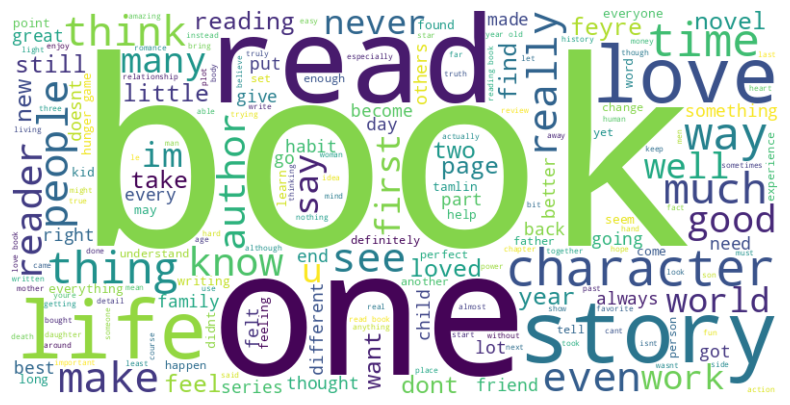

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(corpus)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def generate_bigrams(corpus):
  bigrams = []
  for review in corpus:
    if len(review) > 1:
      bigrams.extend(zip(review[:-1], review[1:]))
  return bigrams

In [ ]:
from collections import Counter
from prettytable import PrettyTable

bigrams = generate_bigrams(corpus)
bigram_counts = Counter(bigrams)
top_100_bigrams = bigram_counts.most_common(50)

table = PrettyTable(['Rank', 'Bigram', 'Frequency'])
table.align['Rank'] = 'l'
table.align['Bigram'] = 'l'
table.align['Frequency'] = 'r'

for rank, (bigram, count) in enumerate(top_100_bigrams, start=1):
  table.add_row([rank, f"{bigram[0]} {bigram[1]}", count])

print(table)

+------+-----------------------+-----------+
| Rank | Bigram                | Frequency |
+------+-----------------------+-----------+
| 1    | hunger game           |        90 |
| 2    | year old              |        75 |
| 3    | read book             |        72 |
| 4    | reading book          |        61 |
| 5    | love book             |        54 |
| 6    | feel like             |        52 |
| 7    | lucy gray             |        52 |
| 8    | book read             |        38 |
| 9    | first book            |        38 |
| 10   | dont know             |        34 |
| 11   | harry potter          |        34 |
| 12   | felt like             |        33 |
| 13   | cant wait             |        32 |
| 14   | highly recommend      |        32 |
| 15   | dont think            |        31 |
| 16   | ive read              |        31 |
| 17   | im sure               |        31 |
| 18   | atomic habit          |        31 |
| 19   | book series           |        29 |
| 20   | e

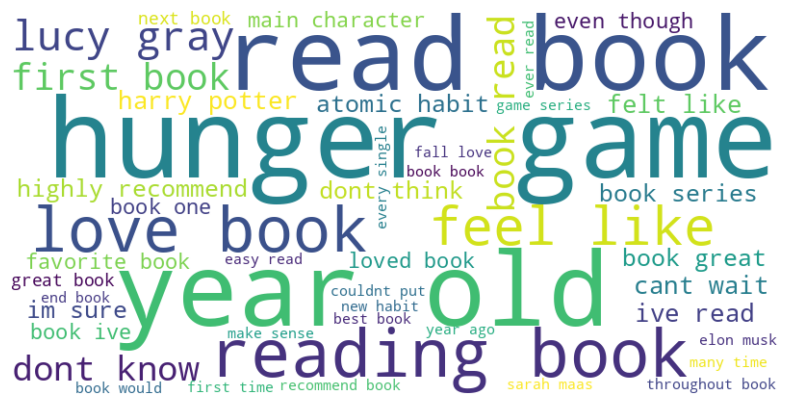

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

bigrams = list(ngrams(corpus, 2))

bigram_strings = [' '.join(bigram) for bigram in bigrams]
bigram_counts = Counter(bigram_strings)

wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10, max_words=1000).generate_from_frequencies(bigram_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def generate_ngrams(corpus, n):

  ngrams = []
  for review in corpus:
    if len(review) >= n:
      for i in range(len(review) - n + 1):
        ngrams.append(tuple(review[i:i+n]))
  return ngrams

In [ ]:
trigrams = generate_ngrams(corpus, 3)
trigram_counts = Counter(trigrams)
top_100_trigrams = trigram_counts.most_common(50)

table = PrettyTable(['Rank', 'Trigram', 'Frequency'])
table.align['Rank'] = 'l'
table.align['Trigram'] = 'l'
table.align['Frequency'] = 'r'

for rank, (trigram, count) in enumerate(top_100_trigrams, start=1):
  table.add_row([rank, f"{trigram[0]} {trigram[1]} {trigram[2]}", count])

print(table)


+------+--------------------------+-----------+
| Rank | Trigram                  | Frequency |
+------+--------------------------+-----------+
| 1    | hunger game series       |        24 |
| 2    | book ive read            |        16 |
| 3    | court thorn rose         |        14 |
| 4    | addition hunger game     |        12 |
| 5    | court mist fury          |        12 |
| 6    | year old love            |        11 |
| 7    | light cannot see         |        11 |
| 8    | van der kolk             |        11 |
| 9    | cant wait see            |         9 |
| 10   | ive ever read            |         9 |
| 11   | killer flower moon       |         8 |
| 12   | best book ive            |         8 |
| 13   | doesnt think he          |         8 |
| 14   | think he bad             |         8 |
| 15   | see begin change         |         8 |
| 16   | ballad songbird snake    |         8 |
| 17   | rich dad poor            |         8 |
| 18   | dad poor dad             |     

**LDA MODEL**

In [ ]:
import gensim
from gensim import corpora

tokenized_corpus = [review.split() for review in corpus]

dictionary = corpora.Dictionary(tokenized_corpus)

bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

num_topics = 4

lda_model2 = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

for idx, topic in lda_model2.print_topics(num_words=20):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.024*"like" + 0.014*"thing" + 0.014*"really" + 0.013*"know" + 0.011*"back" + 0.011*"im" + 0.010*"also" + 0.009*"world" + 0.009*"wager" + 0.007*"want" + 0.007*"never" + 0.006*"recommend" + 0.006*"though" + 0.006*"favorite" + 0.006*"set" + 0.005*"best" + 0.005*"doesnt" + 0.005*"day" + 0.005*"tell" + 0.005*"high"
Topic 2: 0.020*"character" + 0.019*"get" + 0.017*"would" + 0.013*"reading" + 0.011*"feyre" + 0.011*"think" + 0.010*"year" + 0.009*"page" + 0.009*"could" + 0.008*"end" + 0.007*"something" + 0.007*"definitely" + 0.006*"give" + 0.006*"child" + 0.006*"going" + 0.006*"part" + 0.006*"feel" + 0.005*"felt" + 0.005*"tamlin" + 0.005*"long"
Topic 3: 0.097*"book" + 0.027*"one" + 0.025*"love" + 0.019*"time" + 0.014*"way" + 0.013*"much" + 0.012*"first" + 0.012*"make" + 0.011*"reader" + 0.008*"author" + 0.008*"old" + 0.008*"take" + 0.007*"good" + 0.007*"many" + 0.007*"new" + 0.007*"go" + 0.007*"say" + 0.006*"two" + 0.006*"thought" + 0.006*"didnt"
Topic 4: 0.028*"story" + 0.026*"read" 

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model2, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')

coherence_score = coherence_model_lda.get_coherence()

print(f"The coherence score of the LDA model is: {coherence_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The coherence score of the LDA model is: 0.8174588970309629


In [ ]:
import gensim
from gensim import corpora

tokenized_corpus = [review.split() for review in corpus]

dictionary = corpora.Dictionary(tokenized_corpus)

bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

num_topics = 6

lda_model3 = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20)

for idx, topic in lda_model3.print_topics(num_words=20):
    print(f"Topic {idx + 1}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 0.047*"one" + 0.035*"character" + 0.032*"get" + 0.029*"would" + 0.019*"back" + 0.019*"feyre" + 0.018*"also" + 0.017*"year" + 0.011*"thought" + 0.010*"friend" + 0.009*"always" + 0.009*"need" + 0.009*"tamlin" + 0.007*"everyone" + 0.007*"relationship" + 0.006*"word" + 0.006*"able" + 0.006*"father" + 0.006*"feeling" + 0.006*"son"
Topic 2: 0.042*"like" + 0.031*"time" + 0.020*"make" + 0.017*"even" + 0.015*"world" + 0.015*"well" + 0.015*"wager" + 0.014*"could" + 0.014*"work" + 0.014*"end" + 0.012*"every" + 0.010*"going" + 0.010*"ship" + 0.010*"kid" + 0.009*"doesnt" + 0.009*"day" + 0.009*"tell" + 0.007*"another" + 0.007*"yet" + 0.007*"found"
Topic 3: 0.171*"book" + 0.048*"read" + 0.026*"thing" + 0.024*"much" + 0.022*"first" + 0.020*"im" + 0.019*"think" + 0.017*"series" + 0.014*"still" + 0.013*"put" + 0.011*"child" + 0.010*"made" + 0.010*"lot" + 0.009*"together" + 0.009*"long" + 0.008*"writing" + 0.007*"heart" + 0.007*"crew" + 0.006*"bit" + 0.006*"star"
Topic 4: 0.026*"life" + 0.024*"r

In [ ]:
import gensim
from gensim import corpora

tokenized_corpus = [review.split() for review in corpus]

dictionary = corpora.Dictionary(tokenized_corpus)

bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

num_topics = 4

lda_model4 = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20)

for idx, topic in lda_model4.print_topics(num_words=20):
    print(f"Topic {idx + 1}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 0.028*"story" + 0.026*"read" + 0.025*"like" + 0.014*"way" + 0.013*"much" + 0.012*"first" + 0.012*"make" + 0.011*"feyre" + 0.008*"good" + 0.007*"never" + 0.007*"something" + 0.006*"two" + 0.006*"going" + 0.006*"best" + 0.006*"dawn" + 0.005*"always" + 0.005*"felt" + 0.005*"tell" + 0.005*"need" + 0.005*"tamlin"
Topic 2: 0.024*"love" + 0.018*"time" + 0.016*"would" + 0.013*"know" + 0.011*"im" + 0.011*"great" + 0.010*"also" + 0.010*"dont" + 0.010*"little" + 0.010*"year" + 0.009*"page" + 0.009*"world" + 0.008*"wager" + 0.008*"could" + 0.008*"end" + 0.008*"old" + 0.007*"take" + 0.007*"every" + 0.007*"find" + 0.007*"u"
Topic 3: 0.095*"book" + 0.020*"character" + 0.018*"get" + 0.015*"life" + 0.014*"thing" + 0.013*"reading" + 0.011*"think" + 0.011*"loved" + 0.011*"see" + 0.010*"even" + 0.010*"series" + 0.009*"well" + 0.007*"many" + 0.007*"people" + 0.006*"definitely" + 0.006*"give" + 0.006*"naomi" + 0.006*"feel" + 0.006*"part" + 0.006*"kid"
Topic 4: 0.027*"one" + 0.014*"really" + 0.011*"

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model4, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')

coherence_score = coherence_model_lda.get_coherence()

print(f"The coherence score of the LDA model is: {coherence_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The coherence score of the LDA model is: 0.8092158490229738


In [ ]:
from gensim.models import CoherenceModel

topics = [
    ['book', 'read', 'love', 'story', 'one', 'like', 'character', 'time', 'would', 'really', 'know', 'im', 'much', 'loved', 'get', 'thing', 'reading', 'way', 'great', 'year', 'even', 'series', 'dont', 'good', 'little', 'think', 'first', 'see', 'page', 'people'],
    ['book', 'habit', 'life', 'one', 'make', 'read', 'novel', 'reader', 'way', 'see', 'character', 'new', 'time', 'work', 'chapter', 'author', 'also', 'like', 'day', 'think', 'get', 'story', 'reading', 'find', 'many', 'take', 'people', 'want', 'even', 'father'],
    ['book', 'like', 'think', 'he', 'one', 'make', 'read', 'thing', 'life', 'see', 'character', 'dont', 'time', 'wrong', 'know', 'snow', 'much', 'u', 'even', 'capitol', 'get', 'say', 'always', 'take', 'bad', 'story', 'agreement', 'right', 'way', 'also'],
    ['book', 'life', 'verity', 'one', 'time', 'lowen', 'author', 'game', 'make', 'wiesel', 'reader', 'first', 'return', 'hunger', 'experience', 'story', 'palestinian', 'investor', 'world', 'israel', 'family', 'well', 'stock', 'night', 'read', 'lyon', 'work', 'money', 'history', 'understand'],
    ['disease', 'cancer', 'one', 'musk', 'exercise', 'life', 'health', 'naomi', 'people', 'attia', 'ua', 'also', 'medicine', 'elon', 'heart', 'jude', 'knox', 'much', 'year', 'get', 'writes', 'body', 'longevity', 'medical', 'two', 'muscle', 'many', 'protein', 'book', 'way'],
    ['game', 'see', 'gray', 'osage', 'one', 'lucy', 'would', 'hunger', 'also', 'first', 'harry', 'series', 'potter', 'life', 'murders', 'snow', 'way', 'like', 'get', 'make', 'tribute', 'death', 'district', 'coriolanus', 'even', 'story', 'law', 'people', 'time', 'never']
]

table = PrettyTable(["Coherence Measure", "Score"])

#scores
measures = ['c_v', 'u_mass', 'c_npmi', 'c_uci']
scores = []

for measure in measures:
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_corpus, dictionary=dictionary, coherence=measure)
    score = coherence_model.get_coherence()
    scores.append(score)
    table.add_row([measure, score])

print(table)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+-------------------+---------------------+
| Coherence Measure |        Score        |
+-------------------+---------------------+
|        c_v        |  0.8172689358753534 |
|       u_mass      | -21.762673454074996 |
|       c_npmi      | -0.5628628905917877 |
|       c_uci       | -15.552476415314265 |
+-------------------+---------------------+


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_visualization = gensimvis.prepare(lda_model4, bow_corpus, dictionary)

pyLDAvis.display(lda_visualization)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_visualization = gensimvis.prepare(lda_model3, bow_corpus, dictionary)

pyLDAvis.display(lda_visualization)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
